In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/measures_v2.csv')

In [ ]:
data.isnull().sum()

,0
u_q,0
coolant,0
stator_winding,0
u_d,0
stator_tooth,0
motor_speed,0
i_d,0
i_q,0
pm,0
stator_yoke,0


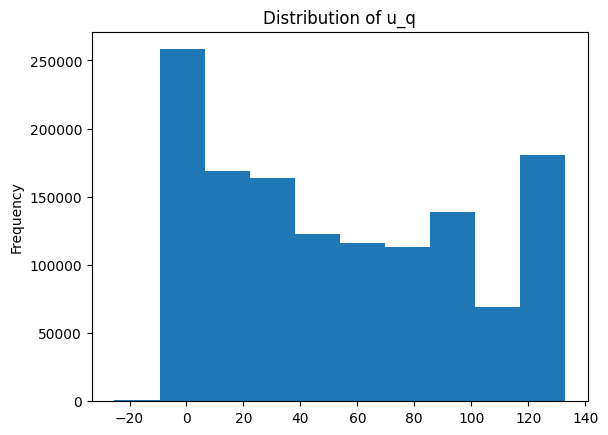

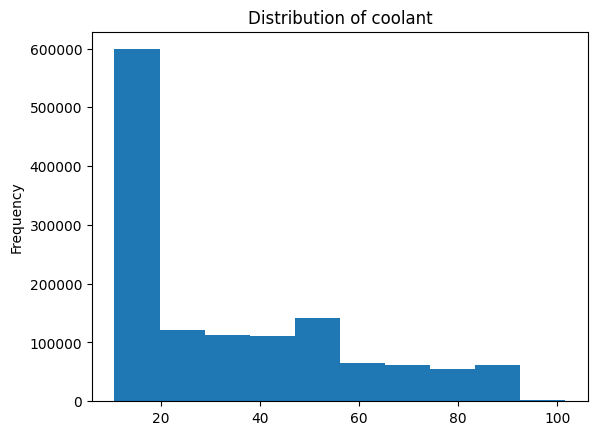

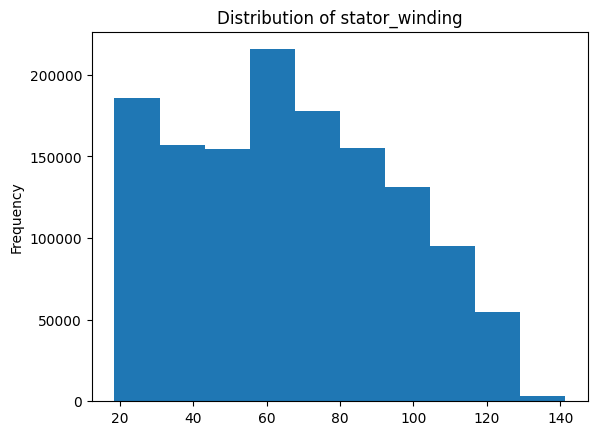

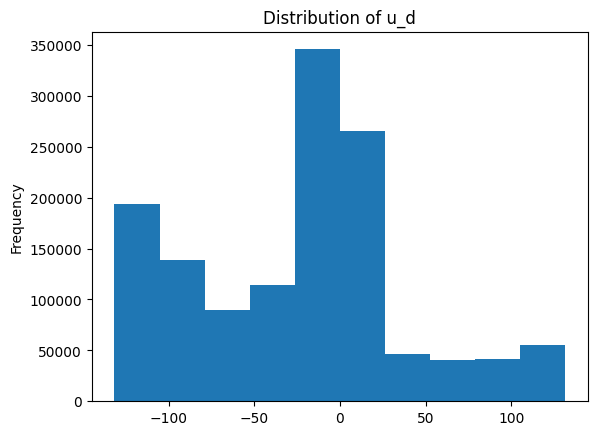

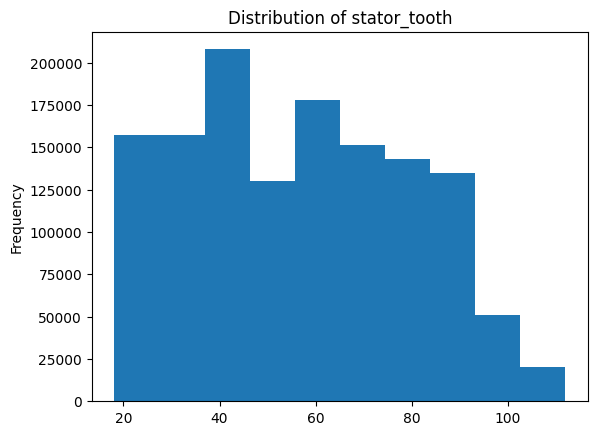

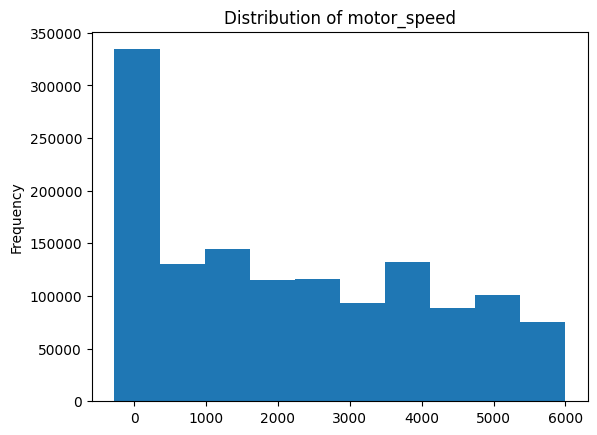

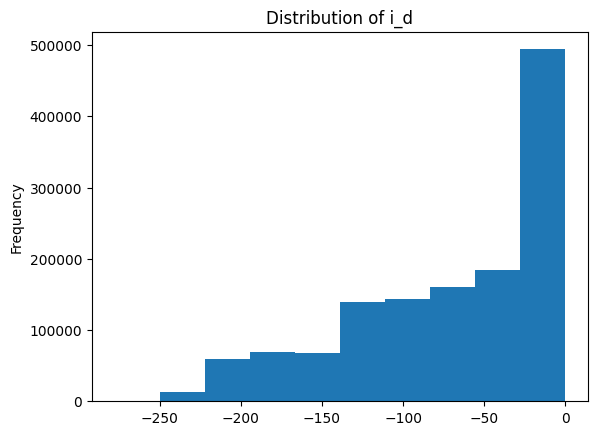

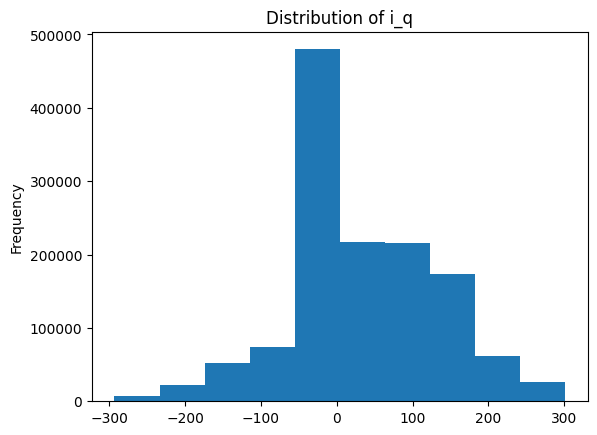

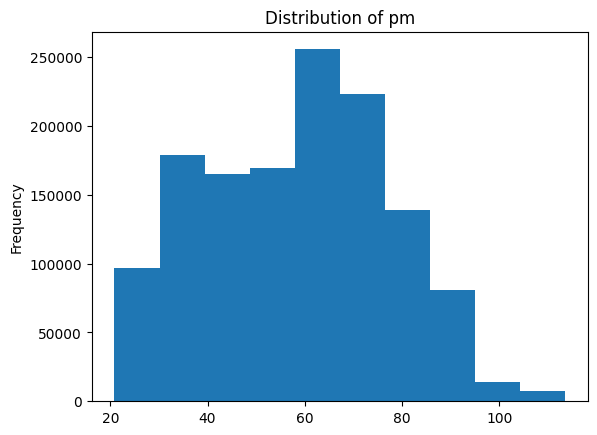

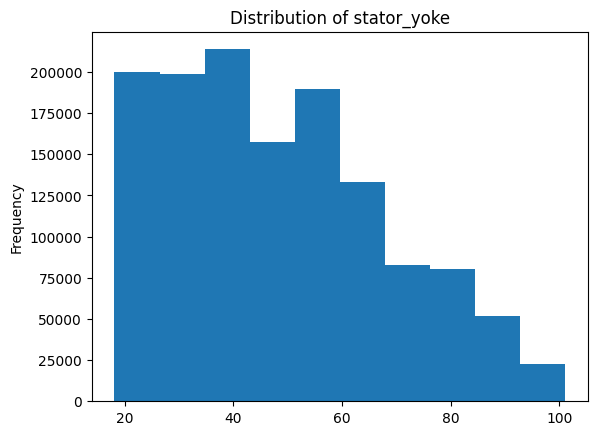

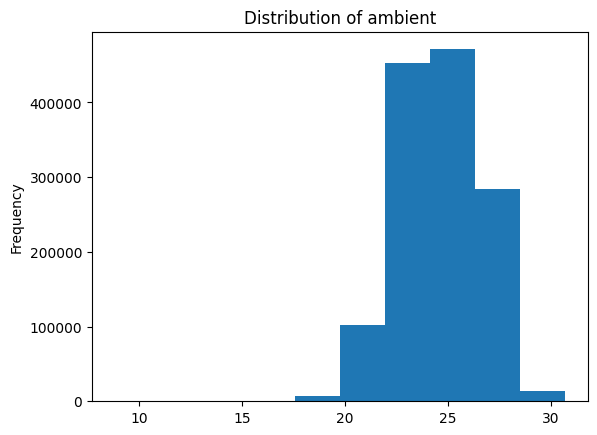

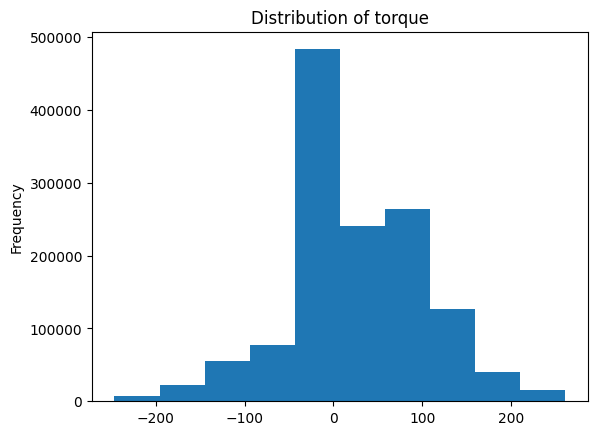

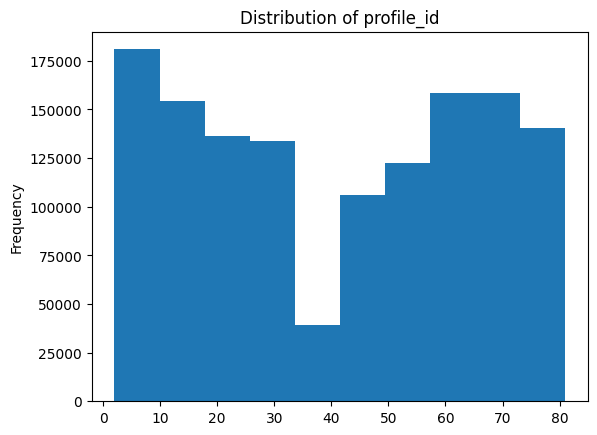

In [ ]:
for i in data.columns:
    data[i].plot(kind='hist')
    plt.title(f'Distribution of {i}')
    plt.show()

<Axes: xlabel='u_d', ylabel='pm'>

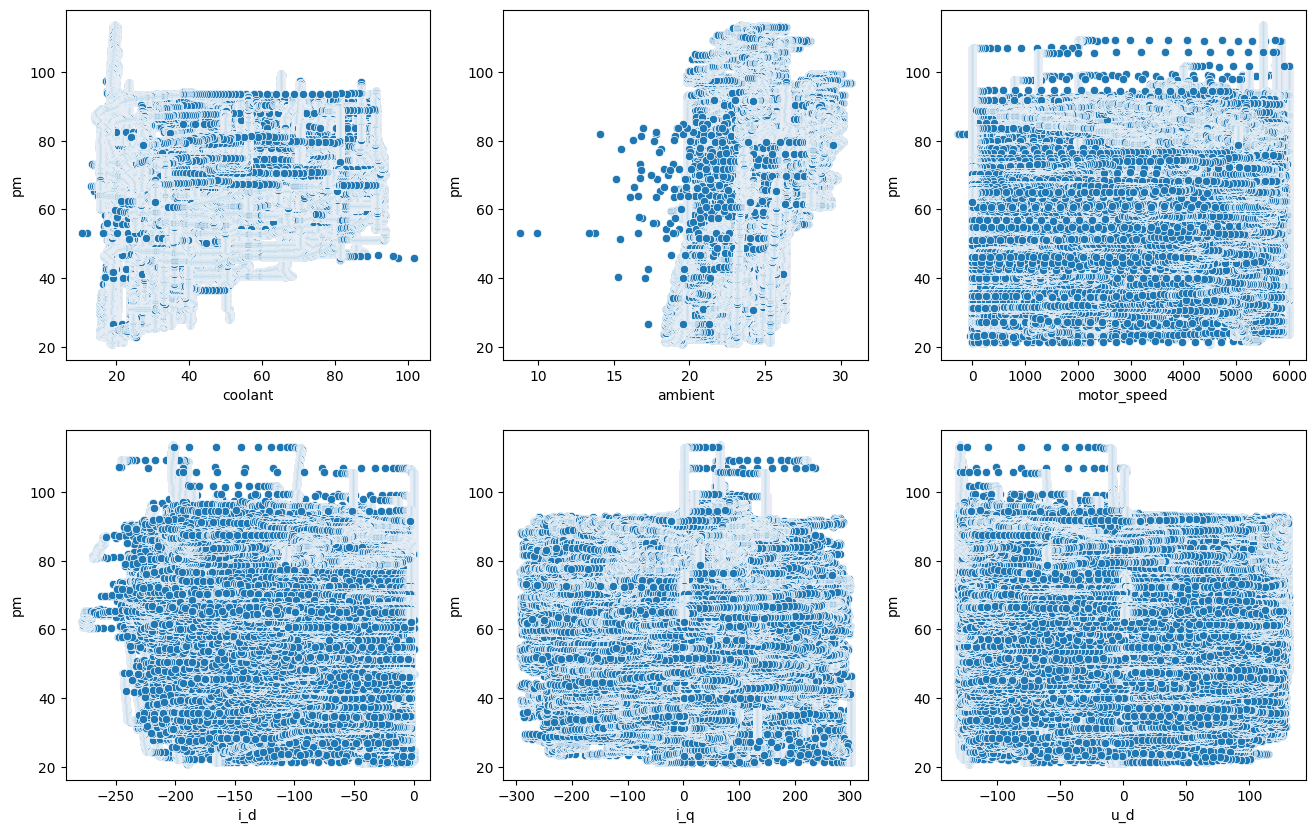

In [ ]:
figure,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,10))
sns.scatterplot(data=data,x = 'coolant', y = 'pm',ax=axes[0,0])
sns.scatterplot(data=data,x = 'ambient', y = 'pm',ax=axes[0,1])
sns.scatterplot(data=data,x = 'motor_speed', y = 'pm',ax=axes[0,2])
sns.scatterplot(data=data,x = 'i_d', y = 'pm',ax=axes[1,0])
sns.scatterplot(data=data,x = 'i_q', y = 'pm',ax=axes[1,1])
sns.scatterplot(data=data,x = 'u_d', y = 'pm',ax=axes[1,2])

In [ ]:
df_corr = data.corr()

<Axes: >

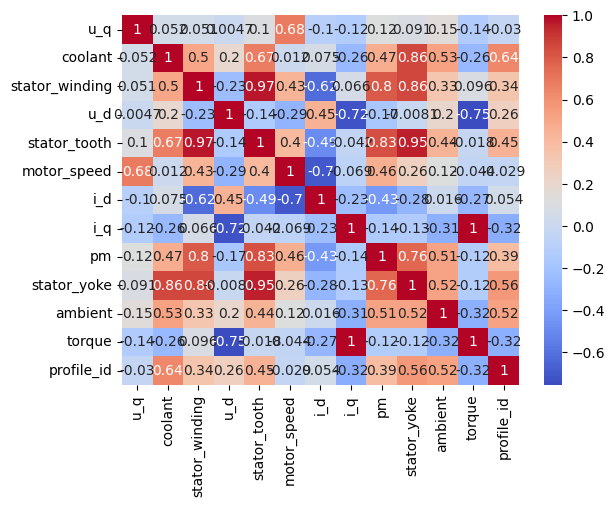

In [ ]:
sns.heatmap(df_corr,annot = True,cmap ='coolwarm')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

data = pd.read_csv('/content/measures_v2.csv')
data.drop('profile_id', axis=1, inplace=True)

X = data.drop(columns=['pm'])
y = data['pm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

joblib.dump((model, list(X.columns)), 'temperature_prediction_model.pkl')

Mean Squared Error: 52.53409440665138
R-squared Score: 0.8545756083091557


['temperature_prediction_model.pkl']

In [ ]:
def predict_temperature():
    """Function to take user input and predict temperature."""
    model, feature_order = joblib.load('temperature_prediction_model.pkl')

    user_input = {}
    for feature in feature_order:
        value = float(input(f"Enter {feature}: "))
        user_input[feature] = value

    input_data = pd.DataFrame([user_input], columns=feature_order)

    prediction = model.predict(input_data)
    print(f"Predicted Temperature (pm): {prediction[0]}")

predict_temperature()

Enter u_q: -0.6531
Enter coolant: 18.80157
Enter stator_winding: 19.074
Enter u_d: 0.2339
Enter stator_tooth: 18.29252
Enter motor_speed: 0.001337
Enter i_d: -1.00567
Enter i_q: 0.524112
Enter stator_yoke: 18.32194
Enter ambient: 19.85063
Enter torque: 0.670015
Predicted Temperature (pm): 26.26770813966592
